# https://github.com/kylargreene/distanceladder

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from DistanceCal import *
from DistanceReader import *
from fitting import *

In [2]:
calib = 'cepheid'
anchor =['N4258','LMC']
supernova_data = 'panth'

# Table read

## reads in anchor distance data

In [3]:
#read in the data from the tables
#file location
file = 'anchor_data.txt'
        #columns to be read in
index_array = [0,1,2]
#length of header
header_length = 1
#deliminator
delim = ' '

anchor_dat = anchor_reader(file,index_array,header_length,delim)

if calib == 'cepheid':
    file = 'SHOES_cepheid_data.txt'
    index_array = [0,1,2,3,4,5,6,7,8,9]
    header_length = 1
    delim = ' '

    SHOES_ceph = SHOES_ceph_table_reader(file,index_array,header_length,delim)

    file = "LMC_ceph_data.txt"
    index_array = [0,0,2,12,22]
    header_length = 1
    delim = ' '
    LMC_ceph = LMC_ceph_reader(file,index_array,header_length,delim)


    # This reads in local SN data from Riess16 table 4

    file = 'SHOES_sn_data.txt'
    index_array = [0,1,2,3]
    header_length = 1
    delim = ' '

    R16_local_sn = SHOES_sn_table_reader(file,index_array,header_length,delim)


# This block is where the hubble flow SN data will be loaded and organized
# Pantheon
# Steinhardt
if supernova_data == 'panth':
    file = 'panth_sn_data.txt'
    index_array = [0,1,2,3,4,5]
    header_length = 1
    delim = ' '

    PS_sn = panth_sn_table_reader(file,index_array,header_length,delim)



In [4]:
print(anchor_dat)

[['N4258', 7576000.0, 158000.0], ['LMC', 49490.0, 630.0]]


In [5]:
print(SHOES_ceph[0])
print(len(SHOES_ceph))

['M101', '115287', 17.95, 24.382, 0.011, 23.408, 0.007, 22.47, 0.3, 9.134]
1114


# CONSTRUCT DATA DICTIONARIES from table

In [6]:
# This takes the imported anchor data, and places it into an anchor 
#data class instance

# NGC4258 Megamaser
# LMC DEB
anchor_dict = {}

for i in range(len(anchor_dat)):
    key = anchor_dat[i][0]
    value = Anchor(anchor_dat[i][0],anchor_dat[i][1],anchor_dat[i][2])
    anchor_dict[key] = value 

In [7]:
# This takes the imported cepheid data, creates a dictionary where 
# the elements of the dictionary are instances
# of the cephied class.
# For clarity the dictionary contains elements organized by host galaxy, 
# each element containing all cephieds in that host.
if calib == 'cepheid':
    print('SH0ES_ceph mh is added')
    
    hosts=[]
    for i in range(len(SHOES_ceph)):
        hosts.append(SHOES_ceph[i][0])
    hosts = np.unique(hosts)


    ceph_dict = {}

    for i in range(len(hosts)):
        temp=[]
        
        for j in range(len(SHOES_ceph)):
            if hosts[i] == SHOES_ceph[j][0]:
                temp.append(SHOES_ceph[j])
            
        k = len(temp)
        host = []
        ID = []
        per = np.zeros(k)
        V = np.zeros(k)
        dV = np.zeros(k)
        I = np.zeros(k)
        dI = np.zeros(k)
        NIR = np.zeros(k)
        dNIR = np.zeros(k)
        OH = np.zeros(k)
            
        key = hosts[i]

        
        for l in range(len(temp)):
            host.append(temp[l][0])
            ID.append(temp[l][1])
            per[l] = temp[l][2]
            V[l] = temp[l][3]
            dV[l] = temp[l][4]
            I[l] = temp[l][5]
            dI[l] =  temp[l][6]
            NIR[l] = temp[l][7]
            dNIR[l] = temp[l][8]
            OH[l] = temp[l][9]


        value = SHOES_ceph_data(host,ID,per,V,dV,I,dI,NIR,dNIR,OH)
        
        ceph_dict[key] = value

    host = [i[0] for i in LMC_ceph]
    idceph =[i[1] for i in LMC_ceph]
    period = [i[2] for i in LMC_ceph]
    mh = [i[3] for i in LMC_ceph]
    dmh = [i[4] for i in LMC_ceph]
    value = LMC_ceph_data(host,idceph,period,mh,dmh)
    ceph_dict['LMC'] = value
    ceph_dict['LMC'].Period = 10**np.array(ceph_dict['LMC'].Period)
    ceph_dict['LMC'].mh = np.array(ceph_dict['LMC'].mh)
    ceph_dict['LMC'].dmh = np.array(ceph_dict['LMC'].dmh)

SH0ES_ceph mh is added


In [8]:
# This takes the imported local SN data, creates a diction 
#where where the elements of the dictionary are instances
# of the local SN class
if calib == 'cepheid':
    hosts=[]
    for i in range(len(R16_local_sn)):
        hosts.append(R16_local_sn[i][0])
    hosts = np.unique(hosts)

    local_sn_dict = {}

    for i in range(len(hosts)):
        temp=[]
        
        for j in range(len(R16_local_sn)):
            if hosts[i] == R16_local_sn[j][0]:
                temp.append(R16_local_sn[j])
            
        k = len(temp)
        host = []
        ID = []
        m = np.zeros(k)
        dm = np.zeros(k)
        
        key = hosts[i]
        
        for l in range(len(temp)):
            host.append(temp[l][0])
            ID.append(temp[l][1])
            m[l] = temp[l][2]
            dm[l] = temp[l][3]


        value = Local_SN_data(host,ID,m,dm)
        local_sn_dict[key] = value


# this block is where the hubble flow sn data will be oragnized 
#into the hubble flow sn class
if supernova_data == 'panth':
    k = len(PS_sn)
    ID = []
    z_hel = np.zeros(k)
    z_cmb = np.zeros(k)
    dz = np.zeros(k)
    m = np.zeros(k)
    dm = np.zeros(k)

    for i in range(len(PS_sn)):

        ID.append(PS_sn[i][0])
        z_hel[i] = PS_sn[i][1]
        z_cmb[i] = PS_sn[i][2]
        dz[i] = PS_sn[i][3]
        m[i] = PS_sn[i][4]
        dm[i] = PS_sn[i][5]

    hubble_sn = Hubble_SN_data(ID,z_hel,z_cmb,dz,m,dm)
    



#  CALCULATIONS

## from geometry distance of anchors to Mceph and mu of SH0ES_ceph

In [9]:
if calib == 'cepheid':
    # This block is where M_ceph will be calculated from each Anchor
    for i in anchor:
        # period is divided by 10 as does by Esthafio (2020)
        period = np.log10(ceph_dict[i].Period/10)
        dperiod = np.zeros(len(period))
        mh = ceph_dict[i].mh
        dmh = ceph_dict[i].dmh

        anchor_dict[i].Compute_abs_ceph_mag(period,dperiod,mh,dmh)
    num = 0
    dem = 0
    Mceph = 0
    dMceph = 0
    for i in anchor:
        num += anchor_dict[i].dMceph*anchor_dict[i].Mceph
        dem += anchor_dict[i].dMceph
        dMceph += anchor_dict[i].dMceph**2
    Mceph = num/dem
    print('based on the distance of anchor LMC N4258, get the Mceph',Mceph)
    dMceph = np.sqrt(dMceph)
    # This is where the slope of the cephied PL relationship is defined

    slope_array = np.zeros(len(ceph_dict))
    dslope_array = np.zeros(len(ceph_dict))
    w_slope_array = np.zeros(len(ceph_dict))
    w_dslope_array = np.zeros(len(ceph_dict))
    count = 0 
    tot = 0
    # the following 3 lines are parameters for the york fit and may be 
    #removed in future updates
    r = 0
    tol = 10**-15
    n = 20

    for key in ceph_dict:
        x = np.log10(ceph_dict[key].Period/10)
        xerror = np.zeros(len(x))
        y = ceph_dict[key].mh
        yerror = ceph_dict[key].dmh
        
        [B_0, B_1, sigma_B_0, sigma_B_1, b_save, B_0_simple, B_1_simple] = york_fit(x,y,xerror,yerror,r,tol,n)
        
        # this calculates the weighted slope and weighted error of the slope for 
    #each cephied host galaxy
        weight = len(x)
        tot += weight
        w_slope_array[count] = B_1*weight
        w_dslope_array[count] = np.power(sigma_B_1,2)*weight
        count+=1

    # This calculates the overall slope of the PL relationship for cephieds, and its error
    slope = sum(w_slope_array)/tot
    dslope = np.sqrt(sum(w_dslope_array)/tot)/np.sqrt(len(ceph_dict))

    print("the observation gives us mh for ceph; based on anchor's Mceph, get the mu of SHOES_ceph")
    for key in ceph_dict:
        period = np.log10(ceph_dict[key].Period/10)
        dperiod = np.zeros(len(period))
        mh = ceph_dict[key].mh
        dmh = ceph_dict[key].dmh
        
        ceph_dict[key].proto_Compute_mu(mh,dmh,period,dperiod,Mceph,dMceph,slope,dslope)

based on the distance of anchor LMC N4258, get the Mceph -6.004854376292982
the observation gives us mh for ceph; based on anchor's Mceph, get the mu of SHOES_ceph


## from mu of SH0ES_ceph to mu of local_sn and then get Msn

SH0ES_cepth and SH0ES_sn/local_sn should have the same distance module

In [10]:
# This block is where Msn will be calculated from SN hosts
x = []
y = []
xerror = []
yerror = []

if calib == 'cepheid':

    for key in local_sn_dict:
        
        local_sn_dict[key].mu = ceph_dict[key].mu
        local_sn_dict[key].dmu = ceph_dict[key].dmu

        x.append(local_sn_dict[key].mu)
        y.append(float(local_sn_dict[key].m))
        xerror.append(local_sn_dict[key].dmu)
        yerror.append(float(local_sn_dict[key].dm))

    x = np.array(x)
    y = np.array(y)
    xerror = np.array(xerror)
    yerror = np.array(yerror)

    [Msn, B1, dMsn, sigma_B1] = weighted_fixed_slope(x,y,1,0,xerror,yerror)

    # This block is where DM_sn_obs will be calculated for each SN

print('get Msn based on ceph mu')

get Msn based on ceph mu


/var/folders/2x/rv34yy5954lf_chxzn0kbl440000gn/T/ipykernel_34267/2610529505.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  y.append(float(local_sn_dict[key].m))
/var/folders/2x/rv34yy5954lf_chxzn0kbl440000gn/T/ipykernel_34267/2610529505.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  yerror.append(float(local_sn_dict[key].dm))


## panth gives us m and from Msn we have mu of hubble_sn; cosmo_mu from redshift given by panth

In [11]:
print('get mu of hubble_sn based on Msn from local SN')
m = hubble_sn.m
dm = hubble_sn.dm
hubble_sn.Compute_hubble_mu(m,dm,Msn,dMsn)


#passes data to loglkl
hubble_mu = hubble_sn.mu
hubble_dmu = hubble_sn.dmu
hubble_z = hubble_sn.z_cmb
hubble_dz = hubble_sn.dz
hubble_dm = dm
hubble_dMsn = dMsn

if calib == 'cepheid':
    print("Cepheid Calibration")
    print("Anchors Used:", anchor)
    print("Abs. Ceph. Mag:", Mceph)
    print("Abs. Ceph. Mag Error:",dMceph)
    print('')
    print("P-L Slope:", slope)
    print("P-L Slope Error:", dslope)
    print('')

print("Msn:",Msn)
print("dMsn:",dMsn)

get mu of hubble_sn based on Msn from local SN
Cepheid Calibration
Anchors Used: ['N4258', 'LMC']
Abs. Ceph. Mag: -6.004854376292982
Abs. Ceph. Mag Error: 0.06704640151165074

P-L Slope: -3.0662326765858308
P-L Slope Error: 0.06982400258653669

Msn: -19.22593144744539
dMsn: 0.03898693870027921


In [12]:

def loglkl(cosmo, data):

    z = hubble_z
    dz = hubble_dz
    dMsn = hubble_dMsn
    dm = hubble_dm		

    k = len(hubble_dmu)

    cosmo_mu = np.zeros(k)
    jac = np.zeros(k)


    # Compute the distance modulus according the to presented cosmological model
    for i in range(k):

        cosmo_mu[i] = 5*np.log10(cosmo.luminosity_distance(z[i]))+25
        jac[i] = ((1+z[i])/cosmo.Hubble(z[i]))+(cosmo.luminosity_distance(z[i])/(1+z[i]))

    # compute the difference between distance modulus from the cosmological model and the local distance ladder
    residuals = np.zeros(k)
    residuals = hubble_mu - cosmo_mu

    cov = np.diag(dm**2+(jac*dz)**2)

    systematic = np.ones((k,k))*dMsn**2

    cov = cov + systematic

    cov = la.cholesky(cov, lower=True, overwrite_a=True)

    residuals = la.solve_triangular(cov,residuals, lower=True, check_finite=False)
    
    chi2 = (residuals**2).sum()
    

    lkl = -0.5*chi2

    sort = np.argsort(z)

    return z[sort], cosmo_mu[sort],hubble_mu[sort]


		

		


In [13]:
from classy import Class
m=Class()
m.compute()


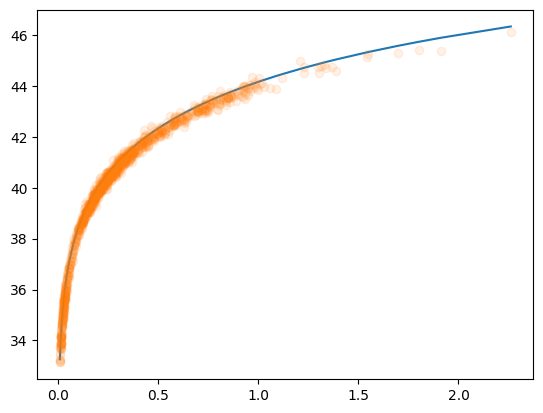

In [14]:
z,cosmo_mu,hubble_mu=loglkl(m,None)
plt.plot(z,cosmo_mu)
plt.plot(z,hubble_mu,'o',alpha=0.1)

In [15]:
# x=np.linspace(18,47,100)
# plt.plot(x,x,'--')
# for key in ['LMC','N4258']:
#     plt.plot(5*np.log10(1e-6*anchor_dict[key].Dist)+25,ceph_dict[key].mu,'ro')
#     plt.plot(5*np.log10(1e-6*anchor_dict[key].Dist)+25,ceph_dict[key].mu,'ro')


# local_sn_mu_from_ceph = [local_sn_dict[key].mu for key in local_sn_dict]
# local_sn_m_M = [local_sn_dict[key].m-Msn for key in local_sn_dict]
# plt.plot(local_sn_mu_from_ceph,local_sn_m_M,'o')

# plt.plot(cosmo_mu,hubble_mu,'o')
#plt.xlabel('mu from distance ladder')
#plt.ylabel('mu from model+redshift')

Text(0.5, 1.0, 'SN $\\mu\\longrightarrow$ Cosmology')

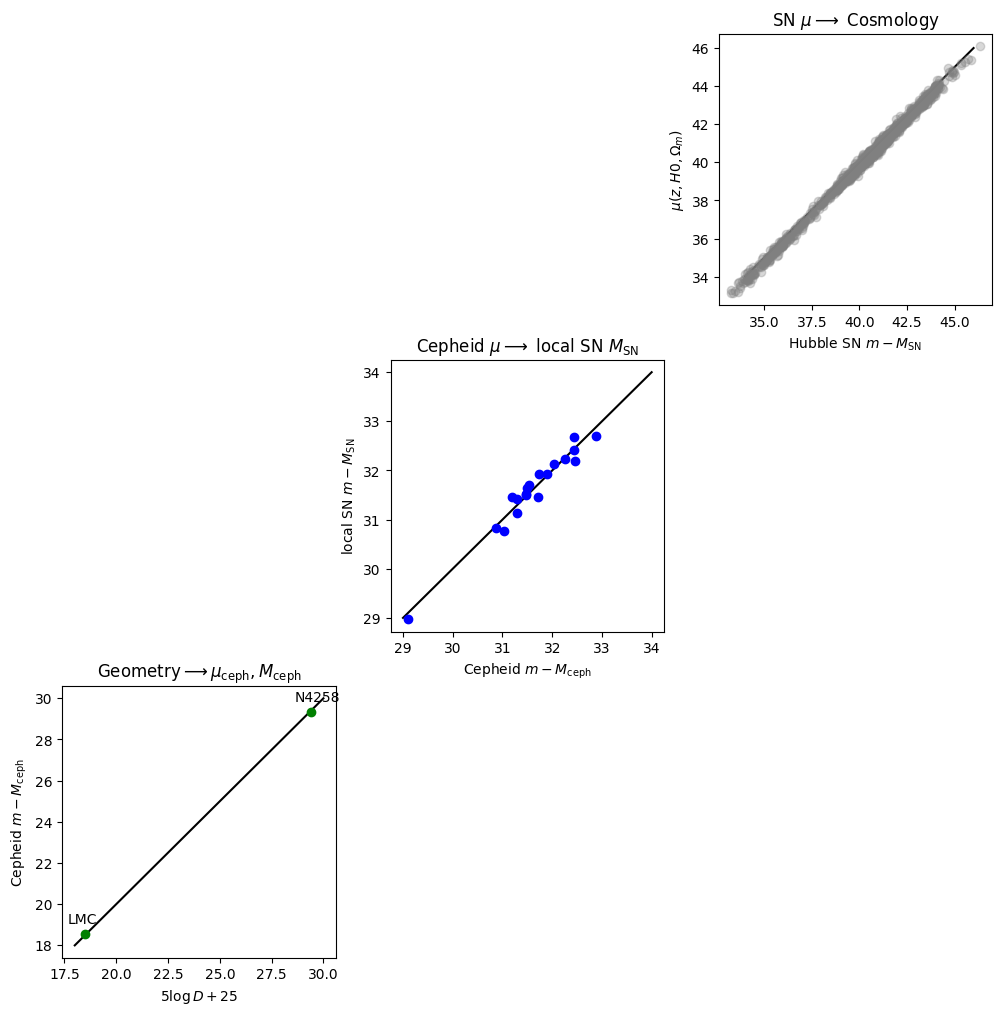

In [29]:
fig, axs = plt.subplots(3, 3, figsize=(12, 12))
for ax in axs.flatten():
    ax.axis('off')

x=np.linspace(18,30,100)
axs[2,0].plot(x,x,'k-')
for key in ['LMC','N4258']:
    x=5*np.log10(1e-6*anchor_dict[key].Dist)+25
    y=ceph_dict[key].mu
    axs[2,0].plot(x,y,'go')
    axs[2,0].annotate(key, xy=(x, y), xytext=(x-0.8, y +0.5),
            arrowprops=None)
axs[2,0].axis('on')
axs[2,0].set_xlabel(r'$5\log D+25$')
axs[2,0].set_ylabel(r"Cepheid $m-M_{\rm ceph}$")
axs[2,0].set_title(r"Geometry$\longrightarrow\mu_{\rm ceph},M_{\rm ceph}$")


x=np.linspace(29,34,100)
axs[1,1].plot(x,x,'k-')
local_sn_mu_from_ceph = [local_sn_dict[key].mu for key in local_sn_dict]
local_sn_m_M = [local_sn_dict[key].m-Msn for key in local_sn_dict]
axs[1,1].plot(local_sn_mu_from_ceph,local_sn_m_M,'bo')
axs[1,1].axis('on')
axs[1,1].set_xlabel(r"Cepheid $m-M_{\rm ceph}$")
axs[1,1].set_ylabel(r"local SN $m-M_{\rm SN}$")
axs[1,1].set_title(r"Cepheid $\mu\longrightarrow$ local SN $M_{\rm SN}$")


x=np.linspace(34,46,100)
axs[0,2].plot(x,x,'k-')
axs[0,2].plot(cosmo_mu,hubble_mu,'o',color='grey',alpha=0.3)
axs[0,2].axis('on')
axs[0,2].set_xlabel(r"Hubble SN $m-M_{\rm SN}$")
axs[0,2].set_ylabel(r"$\mu(z,H0,\Omega_m)$")
axs[0,2].set_title(r"SN $\mu\longrightarrow$ Cosmology")


